<a href="https://colab.research.google.com/github/Dev-LuisVasquez/MineriaAUS/blob/main/Evaluaci%C3%B3n2Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# carga de datos


In [1]:
#Librerías a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#Importar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Leer DataFrame
aus = pd.read_csv("/content/drive/MyDrive/Mineria Datos/ET/weatherAUS.csv")
aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


# Entendimiento del Negocio

> La idea es de realizar este trabajo es para tener una percepcion y buscar patrones dentro del DataSet para predecir las condiciones climaticas en australia a traves de diversos algoritmmos y erramientas que se nos facilito.

> El objetivo final de llevar acabo este proceso es crear un algoritmo final que pueda predecir si el dia de mañana llovera dentro de las ciudades donde mas llueve.

> estos datos a nivel logico estan representados como variables cualitativas, por ende se establecera modelos de entrenamiento de regresion.


# **Ánalisis Exploratorio**

**Descripción del Dataframe**

In [4]:
#Descripción del DataFrame
aus.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Con esta acción obtendremos algunas características de las columnas del dataframe que si necesitamos podremos utilizar más adelante. Obtenemos la cantidad de datos, el promedio, desviación estándar y cuartiles desde el mínimo al máximo.

**Tipos de datos**

In [5]:
#Tipos de datos
aus.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Obtenemos los tipos de datos que más adelante nos van a servir en caso de que haya que modificar alguno para poder trabajar de manera más comoda en nuestro futuro modelo.

**Tamaño del DataFrame**

In [6]:
#Tamaño del dataframe.
print(f"El data frame tiene {aus.shape[0]} filas y {aus.shape[1]} columnas")

El data frame tiene 142193 filas y 24 columnas


**Missing Values**

A continuación, veremos la cantida de nulos que existen por columnas.

In [7]:
print("El total de missing values por columnas es: ")
aus.isnull().sum()

El total de missing values por columnas es: 


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

En un futuro deberemos trabajar en los missing values de dichas columnas que tienen directa relación con la lluvia, con la intención de poder trabajar más limpiamente con nuestro futuro modelo y lograr una mayor precisión. En este caso, la que tienen mayor número de nulos a trabajar son 'Evaporation' y 'Sunshine'.

**Primeros 20 registros de ciudades donde más ha llovido**

In [8]:
lluvia = aus.sort_values("Rainfall", ascending=False)
lluvia.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9236,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,81.0,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,4.8,Yes
136881,2011-02-16,Darwin,22.1,25.6,367.6,NaN,0.0,WSW,83.0,SSE,...,98.0,996.3,996.0,8.0,8.0,24.3,23.5,Yes,184.6,Yes
84897,2009-01-12,Cairns,22.3,27.4,278.4,NaN,0.0,NW,59.0,SSE,...,98.0,1003.5,999.6,8.0,8.0,24.7,25.3,Yes,140.2,Yes
85650,2011-02-04,Cairns,22.9,29.9,268.6,NaN,2.0,ENE,37.0,ENE,...,84.0,1011.1,1009.3,6.0,8.0,29.8,28.0,Yes,13.2,Yes
87022,2015-02-08,Cairns,23.8,31.0,247.2,NaN,2.0,E,44.0,SSE,...,74.0,1014.2,1011.4,8.0,8.0,25.3,30.0,Yes,85.4,Yes
16920,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,NaN,NaN,NW,...,62.0,NaN,NaN,6.0,6.0,17.5,21.0,Yes,0.4,No
90887,2009-02-03,Townsville,22.8,25.4,236.8,NaN,0.0,ESE,48.0,ESE,...,95.0,1003.8,1000.6,8.0,8.0,23.8,25.0,Yes,93.4,Yes
40862,2016-01-06,Williamtown,18.5,19.9,225.0,NaN,0.0,S,80.0,SSW,...,90.0,1008.5,1008.8,8.0,8.0,19.2,19.4,Yes,37.4,Yes
11494,2016-06-05,CoffsHarbour,14.6,19.2,219.6,NaN,NaN,WSW,70.0,WNW,...,83.0,998.5,993.7,8.0,8.0,16.5,18.0,Yes,0.1,No
17174,2016-01-06,Newcastle,15.5,NaN,216.3,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,NaN,8.0,NaN,18.8,NaN,Yes,25.4,Yes


Con esto logramos obtener las tres primeras ciudades donde más llueve en Australia, las cuales son:

1.  **Cairns**: cinco registros, sumando un total de 1183.4 mm
2.  **CoffsHarbour**: cuatro registros, sumando un total de 988.1 mm
3.  **Darwin**: tres registros, sumando un total de 762.8 mm

Por lo cual, con la ciudad que más llueve y con la que trabajaremos es Cairns.


## **Ciudad de Cairns**

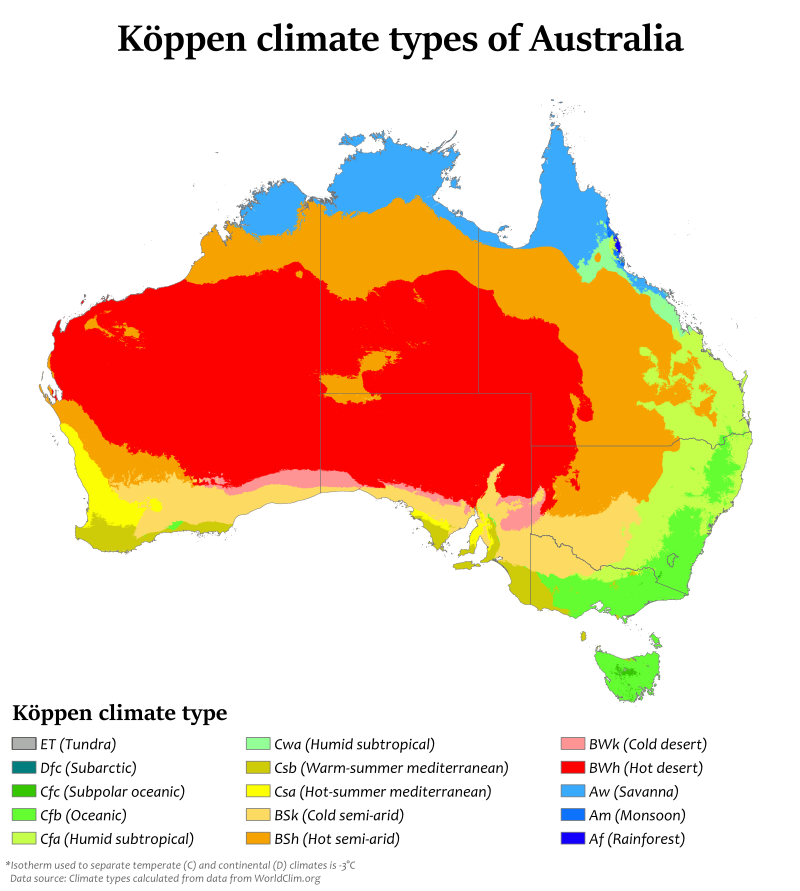

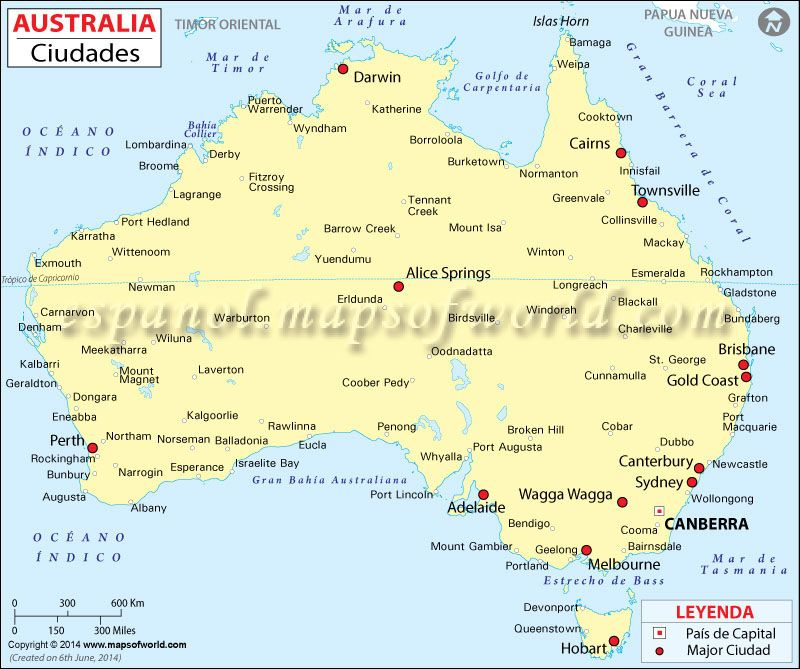

Primero que todo debemos saber que esta ciudad tiene un clima tropical mónzonico. Hay una temporada de lluvias con monzones tropicales que se extiende desde noviembre hasta mayo, con una estación relativamente seca de Junio a Octubre, aunque las lluvias son frecuentes para la mayor parte de este período. También esta ciudad está cerca de la costa por lo cual existe una mayor presión atmosferica que tiene directa relación con el fenomeno meteologico de la lluvia. Por otra parte, como es una ciudad tropical tiene un ambiente cálido debido a la luz del sol brillando, haciendo que el aire caliente suba y la presión baje.

**Fuentes:**   

*   https://es.wikipedia.org/wiki/Cairns#Clima 
*   https://gostudyaus.es/australia/donde-en-australia/cairns/



               

**Filtro Ciudad Cairns**

In [9]:
#Realizaremos un filtro de la ciudad Cairns
FiltroC = aus[
    (aus['Location'].str.contains('Cairns') == True)]
FiltroC

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
84855,2008-12-01,Cairns,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,...,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,No,8.4,Yes
84856,2008-12-02,Cairns,24.2,32.3,8.4,6.6,5.3,NE,35.0,S,...,62.0,1011.9,1008.0,7.0,7.0,29.0,31.1,Yes,0.6,No
84857,2008-12-03,Cairns,23.9,32.8,0.6,5.6,11.3,SSE,31.0,SSE,...,42.0,1012.2,1009.9,7.0,5.0,29.1,31.6,No,0.0,No
84858,2008-12-04,Cairns,22.2,33.6,0.0,9.6,12.3,SE,39.0,SSE,...,31.0,1013.3,1010.9,2.0,1.0,29.6,32.5,No,0.0,No
84859,2008-12-05,Cairns,23.2,33.5,0.0,11.6,11.8,SE,43.0,SSE,...,56.0,1013.8,1011.0,4.0,2.0,29.7,32.2,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87838,2017-06-21,Cairns,19.9,26.1,0.4,NaN,NaN,SE,48.0,S,...,78.0,1019.3,1016.3,8.0,8.0,20.8,23.4,No,0.2,No
87839,2017-06-22,Cairns,19.7,27.4,0.2,NaN,NaN,SE,46.0,SSE,...,61.0,1020.0,1016.7,NaN,8.0,23.0,25.2,No,1.0,No
87840,2017-06-23,Cairns,19.7,27.3,1.0,NaN,NaN,SE,39.0,S,...,55.0,1018.9,1015.3,8.0,8.0,21.2,25.7,No,1.2,Yes
87841,2017-06-24,Cairns,19.3,25.6,1.2,NaN,NaN,E,41.0,S,...,81.0,1016.2,1014.6,5.0,8.0,21.5,22.1,Yes,5.2,Yes


Con este filtro nos centraremos solo en registro que han habido a lo largo de los años en la ciudad de Cairns ya que trabajaremos con ella. Le tomaremos vital atención a los factores que pensamos que están directamente involucrados en la posibilidad de lluvia, los cuales son: Humedad, Evaporación, Presión, Número de horas de sol y Temperatura

##**Promedios**

In [10]:
print('PROMEDIOS CIUDAD DE CAIRNS')
#Humedad
print('-------------------------------------------------------------------------------------------------')
print('Humedad:')
PH = FiltroC['Humidity3pm'].mean()
PH9 = FiltroC['Humidity9am'].mean()
print('El promedio de la humedad a las 3pm en la ciudad de Cairns es de: ', PH)
print('El promedio de la humedad a las 9am en la ciudad de Cairns es de: ', PH9)
print('-------------------------------------------------------------------------------------------------')
#Evaporación
print('Evaporación:')
EV = FiltroC['Evaporation'].mean()
print('El promedio de la evaporación en la ciudad de Cairns es de: ', EV)
print('-------------------------------------------------------------------------------------------------')
#Presión
print('Presión Atmosferica:')
PA9 = FiltroC['Pressure9am'].mean()
PA3P = FiltroC['Pressure3pm'].mean()
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 9am es de: ', PA9)
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de: ', PA3P)
print('-------------------------------------------------------------------------------------------------')
#Horas de sol
print('Horas de sol:')
HS = FiltroC['Sunshine'].mean()
print('El promedio de las horas de sol en la ciudad de Cairns es de: ', HS)
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de: ', PA3P)
print('-------------------------------------------------------------------------------------------------')
#Temperatura
print('Temperatura:') 
T9 = FiltroC['Temp9am'].mean()
T3 = FiltroC['Temp3pm'].mean()
print('La temperatura promedio a las 9am en la ciudad de Cairns es de: ', T9)
print('La temperatura promedio a las 3pm en la ciudad de Cairns es de: ', T3)
print('-------------------------------------------------------------------------------------------------')


PROMEDIOS CIUDAD DE CAIRNS
-------------------------------------------------------------------------------------------------
Humedad:
El promedio de la humedad a las 3pm en la ciudad de Cairns es de:  61.67737617135207
El promedio de la humedad a las 9am en la ciudad de Cairns es de:  69.90227576974564
-------------------------------------------------------------------------------------------------
Evaporación:
El promedio de la evaporación en la ciudad de Cairns es de:  6.21197582168493
-------------------------------------------------------------------------------------------------
Presión Atmosferica:
El promedio de la presión atmosferica en la ciudad de Cairns a las 9am es de:  1014.1542838018759
El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de:  1011.1034471218202
-------------------------------------------------------------------------------------------------
Horas de sol:
El promedio de las horas de sol en la ciudad de Cairns es de:  7.575995316159243

Con esto podemos obtener los promedios de las características meteorologicas principales que influyen en la lluvia, los cuales son muy importantes porque nos aporta en obtener un número tangible promediado entre todos los datos existentes en las columnas.

## **Mínimos y Máximos**

Al igual que en los promedios, utilizaremos las mismas características meteorologicas.

In [11]:
print('MÍNIMOS Y MÁXIMOS CIUDAD DE CAIRNS')
print('-------------------------------------------------------------------------------------------------')
#Humedad
print('Humedad: ')
HMAX = FiltroC['Humidity9am'].max()
HMIN = FiltroC['Humidity9am'].min()
HMAX3 = FiltroC['Humidity3pm'].max()
HMIN3 = FiltroC['Humidity3pm'].min()
print('La humedad máxima a las 9am en la ciudad de Cairns es de: ', HMAX)
print('La humedad mínima a las 9am en la ciudad de Cairns es de: ', HMIN)
print('La humedad máxima a las 3pm en la ciudad de Cairns es de: ', HMAX3)
print('La humedad mínima a las 3pm en la ciudad de Cairns es de: ', HMIN3)
print('-------------------------------------------------------------------------------------------------')
#Evaporación
print('Evaporación: ')
EVMAX = FiltroC['Evaporation'].max()
EVMIN = FiltroC['Evaporation'].min()
print('La evaporación máxima en la ciudad de Cairns es de: ', EVMAX)
print('La evaporación mínima en la ciudad de Cairns es de: ', EVMIN)
print('-------------------------------------------------------------------------------------------------')
#Presión Atmosferica
print('Presión Atmosferica: ')
PA9 = FiltroC['Pressure9am'].max()
PA9M = FiltroC['Pressure9am'].min()
PA3 = FiltroC['Pressure3pm'].max()
PA3M = FiltroC['Pressure3pm'].min()
print('La presión atmosferica máxima a las 9am en la ciudad de Cairns es de: ', PA9)
print('La presión atmosferica mínima a las 9am en la ciudad de Cairns es de: ', PA9M)
print('La presión atmosferica máxima a las 3pm en la ciudad de Cairns es de: ', PA3)
print('La presión atmosferica mínima a las 3pm en la ciudad de Cairns es de: ', PA3M)
print('-------------------------------------------------------------------------------------------------')
print('Horas de sol: ')
HSMA = FiltroC['Sunshine'].max()
HSMI = FiltroC['Sunshine'].min()
print('Las máximas horas de sol que han habido en la ciudad de Cairns es de: ', HSMA)
print('Las mínimas horas de sol que han habido en la ciudad de Cairns es de: ', HSMI)
print('-------------------------------------------------------------------------------------------------')
print('Temperatura: ')
TMA9 = FiltroC['Temp9am'].max()
TMI9 = FiltroC['Temp9am'].min()
TMA3 = FiltroC['Temp3pm'].max()
TMI3 = FiltroC['Temp3pm'].min()
print('La temperatura máxima a las 9am en la ciudad de Cairns es de: ', TMA9)
print('La temperatura mínima a las 9am en la ciudad de Cairns es de: ', TMI9)
print('La temperatura máxima a las 3pm en la ciudad de Cairns es de: ', TMA3)
print('La temperatura mínima a las 3pm en la ciudad de Cairns es de: ', TMI3)
print('-------------------------------------------------------------------------------------------------')


MÍNIMOS Y MÁXIMOS CIUDAD DE CAIRNS
-------------------------------------------------------------------------------------------------
Humedad: 
La humedad máxima a las 9am en la ciudad de Cairns es de:  100.0
La humedad mínima a las 9am en la ciudad de Cairns es de:  24.0
La humedad máxima a las 3pm en la ciudad de Cairns es de:  100.0
La humedad mínima a las 3pm en la ciudad de Cairns es de:  14.0
-------------------------------------------------------------------------------------------------
Evaporación: 
La evaporación máxima en la ciudad de Cairns es de:  44.4
La evaporación mínima en la ciudad de Cairns es de:  0.2
-------------------------------------------------------------------------------------------------
Presión Atmosferica: 
La presión atmosferica máxima a las 9am en la ciudad de Cairns es de:  1024.2
La presión atmosferica mínima a las 9am en la ciudad de Cairns es de:  994.4
La presión atmosferica máxima a las 3pm en la ciudad de Cairns es de:  1021.9
La presión atmosfer

## **Filtro ciudades CoffsHarbour y Darwin**

## **CoffsHarbour**

Es una ciudad costera ubicada al norte de Nueva Gales del Sur. Los veranos en esta ciudad son calurosos y húmedos, los inviernos son cortos y frescos y está mojado y despejado la mayor parte del año. Durante el transcurso del año, la temperatura generalmente varía de 8 °C a 27 °C y rara vez baja a menos de 4 °C o sube a más de 30 °C. 

In [12]:
#Realizaremos un filtro de la ciudad CoffsHarbour
FiltroCO = aus[
    (aus['Location'].str.contains('CoffsHarbour') == True)]
FiltroCO

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
8927,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,NNE,54.0,N,...,58.0,1005.9,1002.3,1.0,5.0,26.5,28.4,No,0.0,No
8928,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,SSW,56.0,SSW,...,67.0,1010.9,1011.4,7.0,7.0,23.4,24.4,No,4.6,Yes
8929,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,SE,35.0,SE,...,59.0,1019.3,1018.8,8.0,7.0,21.7,23.7,Yes,0.8,No
8930,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,E,24.0,SSE,...,45.0,1019.5,1017.0,5.0,2.0,22.5,24.8,No,0.0,No
8931,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,NE,41.0,NW,...,62.0,1015.7,1012.7,1.0,6.0,24.6,26.1,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2017-06-21,CoffsHarbour,14.5,21.4,0.0,NaN,NaN,S,39.0,WSW,...,59.0,1023.8,1022.6,NaN,7.0,17.6,20.2,No,0.0,No
11876,2017-06-22,CoffsHarbour,14.1,21.4,0.0,NaN,NaN,S,30.0,WSW,...,58.0,1026.3,1023.4,1.0,NaN,18.5,20.4,No,0.0,No
11877,2017-06-23,CoffsHarbour,8.3,20.0,0.0,NaN,NaN,SSE,20.0,NNW,...,62.0,1022.7,1017.6,NaN,NaN,15.1,19.5,No,0.0,No
11878,2017-06-24,CoffsHarbour,10.9,20.6,0.0,NaN,NaN,SW,26.0,SW,...,51.0,1017.8,1015.7,7.0,1.0,16.4,20.0,No,0.0,No


## **Ciudad de Darwin**

Darwin es la capital del territorio del norte de Australia. También es una ciudad costera que contiene playas y áreas verdes. En Darwin, la temporada de lluvia es opresiva y nublada, y dura desde noviembre hasta abril, mientras que la temporada seca es bochornosa y parcialmente nublada y es muy caliente durante todo el año.

In [13]:
FiltroD = aus[
    (aus['Location'].str.contains('Darwin') == True)]
FiltroD

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
135921,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
135922,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No
135923,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,0.0,No
135924,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,0.0,No
135925,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


A continuación haremos gráficos comparativos que confirman que la ciudad de Cairns es donde más llueve en Australia.

##**Gráficos**

Text(0.5, 1.0, 'Cantidad de días con lluvia en Darwin')

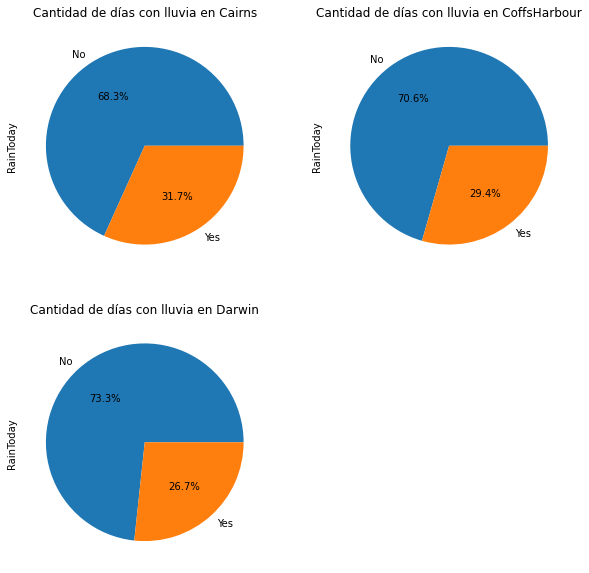

In [63]:
#Gráfico de torta Cairns, CoffsHarbour y Darwin
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
DLC = FiltroC.RainToday.value_counts()
DLC.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en Cairns')


plt.subplot(2,2,2)
DLCO = FiltroCO.RainToday.value_counts()
DLCO.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en CoffsHarbour')


plt.subplot(2,2,3)
DLD = FiltroD.RainToday.value_counts()
DLD.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en Darwin')


Esto nos responde que Cairns tiene más días de lluvia en comparación a CoffsHarbour y Darwin, confirmando que Cairns es la ciudad donde más llueve en Australia. Esto nos ayuda a seguir manteniendo nuestra hipotesis en pie. Aunque no existe mucha diferencia en cuanto a porcentaje en estas tres ciudades.

**A continuación haremos un filtro con las 3 ciudades seleccionando el año 2016, para comparar las condiciones meteorologicas de las tres ciudades.**

**Filtro de la ciudad de Cairns y sus registros en el año 2016**

In [15]:
FiltroC2016 = FiltroC[
    (FiltroC['Date'].str.contains('2016') == True)]
FiltroC2016


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
87349,2016-01-01,Cairns,23.0,28.9,0.8,1.5,3.0,E,30.0,SE,...,66.0,1011.8,1008.5,7.0,5.0,25.5,28.1,No,7.2,Yes
87350,2016-01-02,Cairns,23.2,29.8,7.2,3.6,7.5,N,24.0,NE,...,75.0,1009.9,1005.6,5.0,5.0,27.7,29.3,Yes,0.6,No
87351,2016-01-03,Cairns,23.6,30.6,0.6,5.0,6.8,N,35.0,NNE,...,66.0,1006.9,1004.0,3.0,7.0,28.9,29.1,No,0.2,No
87352,2016-01-04,Cairns,24.0,34.6,0.2,3.7,10.4,W,35.0,NW,...,64.0,1007.7,1004.5,3.0,2.0,29.2,30.8,No,0.0,No
87353,2016-01-05,Cairns,23.1,35.3,0.0,8.0,12.6,N,31.0,SSE,...,41.0,1009.5,1005.7,1.0,1.0,32.1,32.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87662,2016-12-21,Cairns,24.0,33.0,1.2,17.6,NaN,ESE,41.0,SE,...,49.0,1012.1,1009.7,NaN,NaN,29.4,31.6,Yes,0.0,No
87663,2016-12-22,Cairns,22.4,33.0,0.0,NaN,NaN,E,39.0,SSE,...,49.0,1011.4,1008.8,NaN,NaN,29.1,31.7,No,0.0,No
87664,2016-12-28,Cairns,24.4,33.7,NaN,NaN,NaN,SSE,39.0,S,...,65.0,1008.7,1005.8,7.0,7.0,28.6,30.2,NaN,0.2,No
87665,2016-12-30,Cairns,23.8,33.1,NaN,NaN,NaN,NNE,37.0,SE,...,64.0,1005.6,1002.9,NaN,1.0,30.2,30.6,NaN,3.2,Yes


**Filtro de la ciudad de CoffsHarbour y sus registros en el año 2016**

In [16]:
FiltroCO2016 = FiltroCO[
    (FiltroCO['Date'].str.contains('2016') == True)]
FiltroCO2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
11338,2016-01-01,CoffsHarbour,18.4,26.1,0.0,NaN,NaN,S,35.0,SW,...,56.0,1015.1,1013.2,7.0,NaN,22.2,24.0,No,0.0,No
11339,2016-01-02,CoffsHarbour,17.2,24.7,0.0,NaN,NaN,S,30.0,S,...,61.0,1012.6,1010.2,1.0,5.0,22.9,23.0,No,0.0,No
11340,2016-01-03,CoffsHarbour,19.8,22.0,0.0,NaN,NaN,SW,30.0,SW,...,87.0,1012.9,1012.5,7.0,8.0,21.3,21.0,No,4.8,Yes
11341,2016-01-04,CoffsHarbour,18.4,26.4,4.8,NaN,NaN,S,37.0,SW,...,70.0,1014.3,1011.6,8.0,5.0,21.4,25.8,Yes,0.0,No
11342,2016-01-05,CoffsHarbour,20.3,24.0,0.0,NaN,NaN,ESE,26.0,SW,...,86.0,1012.4,1009.0,8.0,8.0,22.3,23.5,No,12.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,2016-12-27,CoffsHarbour,20.7,28.4,0.0,NaN,NaN,NNE,50.0,NNW,...,61.0,1016.4,1014.3,NaN,NaN,26.1,27.2,No,0.0,No
11700,2016-12-28,CoffsHarbour,18.9,28.9,0.0,NaN,NaN,NNE,50.0,N,...,66.0,1016.1,1013.2,1.0,NaN,24.6,26.6,No,0.0,No
11701,2016-12-29,CoffsHarbour,20.7,32.0,0.0,NaN,NaN,NE,59.0,NNW,...,65.0,1010.4,1006.8,NaN,NaN,28.5,27.9,No,0.0,No
11702,2016-12-30,CoffsHarbour,19.8,29.2,0.0,NaN,NaN,NE,61.0,NE,...,65.0,1005.8,1003.2,NaN,1.0,25.6,27.9,No,0.0,No


**Filtro de la ciudad de Darwin y registros en el año 2016**

In [17]:
FiltroD2016 = FiltroD[
    (FiltroD['Date'].str.contains('2016') == True)]
FiltroD2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
138572,2016-01-01,Darwin,27.4,32.7,0.0,7.0,11.2,WNW,46.0,WNW,...,62.0,1010.6,1009.0,2.0,3.0,29.8,31.6,No,0.0,No
138573,2016-01-02,Darwin,27.5,32.1,0.0,8.2,11.0,WNW,48.0,WNW,...,71.0,1010.6,1008.0,3.0,5.0,29.7,31.1,No,0.0,No
138574,2016-01-03,Darwin,27.3,32.9,0.0,7.6,10.3,NW,43.0,W,...,67.0,1011.3,1008.6,3.0,2.0,30.1,31.9,No,0.0,No
138575,2016-01-04,Darwin,27.6,33.3,0.0,6.2,12.1,WNW,37.0,WNW,...,62.0,1012.6,1010.2,3.0,3.0,29.7,32.6,No,0.0,No
138576,2016-01-05,Darwin,27.4,33.2,0.0,7.6,11.9,WNW,39.0,WNW,...,66.0,1013.1,1010.1,2.0,2.0,30.0,32.5,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138933,2016-12-27,Darwin,24.4,31.6,31.8,11.0,3.5,NaN,NaN,ENE,...,80.0,1006.1,1004.5,4.0,6.0,28.8,28.9,Yes,58.4,Yes
138934,2016-12-28,Darwin,23.9,28.7,58.4,19.2,0.0,NW,56.0,NaN,...,84.0,1007.2,1004.9,7.0,7.0,25.0,27.5,Yes,25.2,Yes
138935,2016-12-29,Darwin,25.2,31.7,25.2,2.2,3.8,W,41.0,S,...,66.0,1006.8,1003.5,8.0,7.0,26.9,30.6,Yes,5.4,Yes
138936,2016-12-30,Darwin,26.3,30.9,5.4,4.2,0.0,SSW,52.0,W,...,90.0,1003.9,1004.1,8.0,8.0,29.6,24.1,Yes,9.8,Yes


Estos filtros se hicieron para poder reducir en una dimensión más pequeña para poder tener una comparación un poco más exacta. Esto se hizo para poder realizar los gráficos comparativos correspondientes, para que estos se entiendan y no se distorcionen por tantos registros.

## **Gráfico de Humedad**

**Cairns**

Se realizará un filtro de la humedad que hubo en la ciudad de Cairns solo en el año 2016, para posteriormente mostrar solo los 10 primeros que hubieron.

In [18]:
FiltroHumC= FiltroC2016['Humidity3pm']
FiltroHumC.head(10)

HumCC= FiltroHumC.head(10)
HumCC


87349    66.0
87350    75.0
87351    66.0
87352    64.0
87353    41.0
87354    40.0
87355    42.0
87356    74.0
87357    67.0
87358    64.0
Name: Humidity3pm, dtype: float64

Realizamos el filtro de la humedad a las 3pm el año 2016, y luego realizamos un head para obtener los primeros 10 registros, posteriormente guardamos esos registros en una variable para en un futuro realizar gráficos

**A continuación, graficaremos.**

Text(0.5, 1.0, 'Humedad en la Ciudad de Cairns Año 2016')

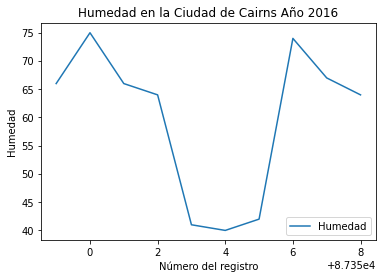

In [19]:
#Gráfico de Humedad de Cairns en el año 2016
plt.plot(HumCC, label="Humedad")
plt.xlabel("Número del registro")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de Cairns Año 2016')

Podemos observar que en los primeros registros se llega a la mayor húmedad existente en estos mismo, con un 75% de humedad, luego va disminuyendo llegando al mínimo que fue 40% para posteriormente denuevo llegar casi a los 75%. Esto quiere decir que la Ciudad de Cairns la mayor parte del tiempo tiene registros por sobre los 60% de humedad, lo cual es un factor clave de lluvia, que nos puede responder porque ha llovido tanto en dicha ciudad.

**CoffsHarbour**

Se realizará un filtro de la humedad que hubo en la ciudad de CoffsHarbour solo en el año 2016, para posteriormente mostrar solo los 10 primeros que hubieron.

In [20]:
HumCO = FiltroCO2016['Humidity3pm']
HumCO.head(10)

HumCCO = HumCO.head(10)
HumCCO

11338    56.0
11339    61.0
11340    87.0
11341    70.0
11342    86.0
11343    66.0
11344    53.0
11345    60.0
11346    62.0
11347    66.0
Name: Humidity3pm, dtype: float64

Text(0.5, 1.0, 'Humedad en la Ciudad de CoffsHarbour Año 2016')

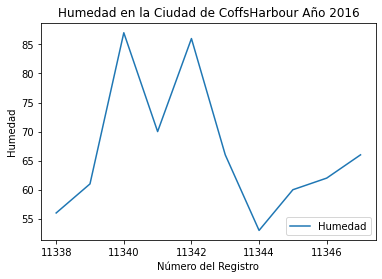

In [21]:
plt.plot(HumCCO, label="Humedad")
plt.xlabel("Número del Registro")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de CoffsHarbour Año 2016')

La conclusión que se puede sacar de este gráfico es que igual que Cairns en estos registros existe un máximo de sobre 80% de humedad, cabe recalcar que este tope existe en estos registros solamente no es que sea una constante en esta ciudad ya que los demás registros baja demasiado el porcentaje de la ciudad de CoffsHarbour.

**Darwin**

Se realizará un filtro de la humedad que hubo en la ciudad de Darwin solo en el año 2017, para posteriormente mostrar solo los 10 primeros que hubieron

In [22]:
HumD = FiltroD2016['Humidity3pm']
HumD.head(10)

HumDD = HumD.head(10)
HumDD

138572    62.0
138573    71.0
138574    67.0
138575    62.0
138576    66.0
138577    55.0
138578    62.0
138579    62.0
138580    64.0
138581    65.0
Name: Humidity3pm, dtype: float64

Text(0.5, 1.0, 'Humedad en la Ciudad de Darwin Año 2016')

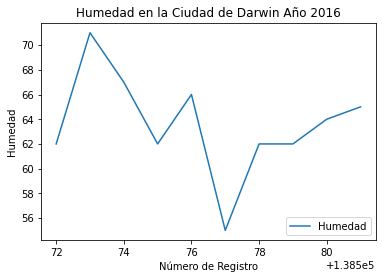

In [23]:
plt.plot(HumDD, label="Humedad")
plt.xlabel("Número de Registro")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de Darwin Año 2016')

Se puede observar que el máximo de humedad en la ciudad de Darwin, fue de un 70%, mientras que en los demás registros va disminuyendo, por lo cual el promedio de humedad en esta ciudad es de un 60%.

En estos gráficos se puede corroborar que las 3 ciudades en comparación, existe un porcentaje de humedad bastante alto en comparación a las demás ciudades, por lo cual esto es un punto en común, que puede responder que la humedad es un factor clave en estas ciudades que explica el porqué son en las que más se da la lluvia. 

**A continuación repetiremos el mismo método nombrado anteriormente para imprimir los primeros 10 valores de la temperatura en las 3 ciudades.**

**Cairns**

In [24]:
#Filtro Temperatura 9am en Cairns
FiltroTemp9C= FiltroC2016['Temp9am']
FiltroTemp9C.head(10)

Temp9CC = FiltroTemp9C.head(10)
Temp9CC

#Filtro Temperatura 3pm en Cairns
FiltroTemp3C = FiltroC2016['Temp3pm']
FiltroTemp3C.head(10)

Temp3C = FiltroTemp3C.head(10)
Temp3C

87349    28.1
87350    29.3
87351    29.1
87352    30.8
87353    32.6
87354    33.3
87355    33.4
87356    31.2
87357    31.1
87358    30.2
Name: Temp3pm, dtype: float64

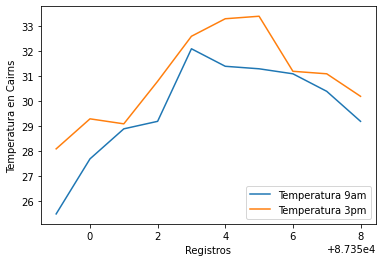

In [25]:
plt.plot(Temp9CC, label="Temperatura 9am")
plt.plot(Temp3C, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura en Cairns")
plt.legend(loc="lower right") 

Se puede observar que en Cairns no varía mucho la temperatura desde las 9 de la mañana hasta las 3 de la tarde, en los primeros registros sube alrededor de 2 grados celsius y despues ya sobrepasa los 30 grados y se mantiene sobre estos, llegando a un máximo de 35° aproximadamente.

**CoffsHarbour**

In [26]:
#Filtro Temperatura 9am en CoffsHarbour
FiltroTemp9CO= FiltroCO2016['Temp9am']
FiltroTemp9CO.head(10)

Temp9CO= FiltroTemp9CO.head(10)
Temp9CO

#Filtro Temperatura 3pm en CoffsHarbour
FiltroTemp3CO = FiltroCO2016['Temp3pm']
FiltroTemp3CO.head(10)

Temp3CO = FiltroTemp3CO.head(10)
Temp3CO

11338    24.0
11339    23.0
11340    21.0
11341    25.8
11342    23.5
11343    25.1
11344    26.1
11345    24.6
11346    25.2
11347    26.1
Name: Temp3pm, dtype: float64

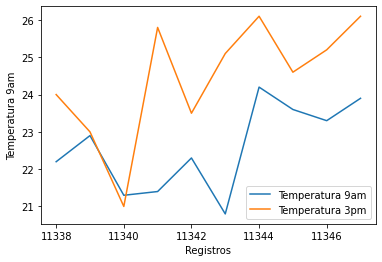

In [27]:
plt.plot(Temp9CO, label="Temperatura 9am")
plt.plot(Temp3CO, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura 9am")
plt.legend(loc="lower right") 

La temperatura en CoffsHarbour, si varía un poco más que en la ciudad de Cairns, pero existe menor temperatura, en los registros expuestos en el gráfico, las temperaturas sobrepasan los 20 grados tanto como las 9 am y 3pm, aunque a las 3pm aumenta mucho má en diferencia a las 9am, llegando al máximo de 26° aproximadamente.

**Darwin**

In [28]:
FiltroTemp9D= FiltroD2016['Temp9am']
FiltroTemp9D.head(10)

Temp9D= FiltroTemp9D.head(10)
Temp9D

#Filtro Temperatura 3pm en Darwin
FiltroTemp3D = FiltroD2016['Temp3pm']
FiltroTemp3D.head(10)

Temp3D = FiltroTemp3D.head(10)
Temp3D

138572    31.6
138573    31.1
138574    31.9
138575    32.6
138576    32.5
138577    32.8
138578    32.5
138579    31.7
138580    31.1
138581    31.6
Name: Temp3pm, dtype: float64

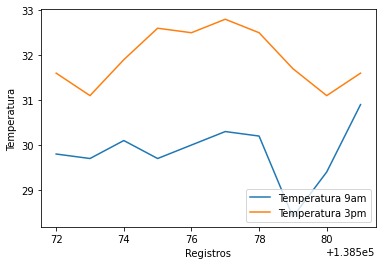

In [29]:
plt.plot(Temp9D, label="Temperatura 9am")
plt.plot(Temp3D, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura")
plt.legend(loc="lower right") 

En cuanto a la temperatura en la ciudad de Darwin, podemos observar que las temperaturas son bastante altas desde las 9 de la mañana, casi llegando a 30 grados, luego a las 3pm todas se elevan por sobre los 31 grados. 

Se puede deducir que dos ciudades se asemejan más sus temperaturas a las 3pm, las cuales son Cairns y Darwin, mientras que CoffsHarbour sus temperaturas son menores a estas dos ciudades. Llegamos a la conclusión, que la temperatura si es un factor clave en la lluvia, pero que no influye tanto como se pensaba y no tiene la influencia que otros factores tienen sobre el fenomeno de lluvia en estas ciudades, porque hay que recordar que las 3 son ciudades costeras y dos de ellas son de clima tropical por lo cual es normal que haya esta temperatura y llueva, mientras que en otras ciudades si hubiera esta temperatura sería imposible que lloviera.

##**Gráfico de Presión a las 9am y 3pm**

In [30]:
Press9C= FiltroC2016['Pressure9am']
Press9C.head(10)

Press9Ca = Press9C.head(10)
Press9Ca

#Filtro Temperatura 3pm en Darwin
Press3C = FiltroC2016['Pressure3pm']
Press3C.head(10)

Press3Ca = Press3C.head(10)
Press3Ca

87349    1008.5
87350    1005.6
87351    1004.0
87352    1004.5
87353    1005.7
87354    1007.0
87355    1007.8
87356    1011.5
87357    1014.0
87358    1013.2
Name: Pressure3pm, dtype: float64

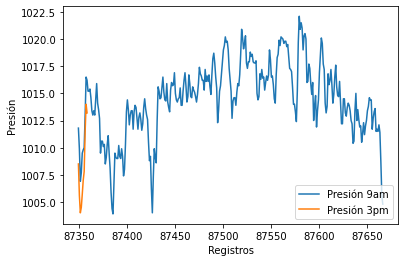

In [31]:
plt.plot(Press9C, label="Presión 9am")
plt.plot(Press3Ca, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

In [32]:
Press9CO= FiltroCO2016['Pressure9am']
Press9CO.head(10)

Press9COO = Press9CO.head(10)
Press9COO

#Filtro Temperatura 3pm en Darwin
Press3CF = FiltroCO2016['Pressure3pm']
Press3CF.head(10)

Press3F = Press3CF.head(10)
Press3F

11338    1013.2
11339    1010.2
11340    1012.5
11341    1011.6
11342    1009.0
11343    1004.4
11344    1011.2
11345    1018.5
11346    1019.5
11347    1018.7
Name: Pressure3pm, dtype: float64

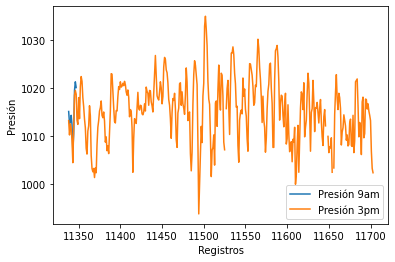

In [33]:
plt.plot(Press9COO, label="Presión 9am")
plt.plot(Press3CF, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

In [34]:
Press9D= FiltroD2016['Pressure9am']
Press9D.head(10)

Press9Da = Press9D.head(10)
Press9Da

#Filtro Temperatura 3pm en Darwin
Press3D = FiltroD2016['Pressure3pm']
Press3D.head(10)

Press3Da = Press3D.head(10)
Press3Da

138572    1009.0
138573    1008.0
138574    1008.6
138575    1010.2
138576    1010.1
138577    1010.6
138578    1010.2
138579    1010.9
138580    1011.2
138581    1011.3
Name: Pressure3pm, dtype: float64

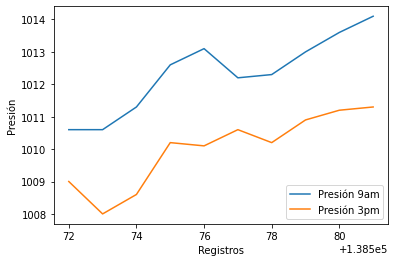

In [35]:
plt.plot(Press9Da, label="Presión 9am")
plt.plot(Press3Da, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

# **Transformación y limpieza**

## Copia del Data Frame

In [36]:
aus2 = aus
aus2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


## **Eliminación de columnas**

**Eliminación de las columnas con las que NO trabajaremos**

In [37]:
aus2 = aus2.drop(columns  = 'MinTemp')
aus2 = aus2.drop(columns  = 'MaxTemp')
aus2 = aus2.drop(columns  = 'WindGustDir')
aus2 = aus2.drop(columns = 'WindGustSpeed')
aus2 = aus2.drop(columns = 'WindSpeed9am')
aus2 = aus2.drop(columns = 'WindSpeed3pm')
aus2 = aus2.drop(columns = 'WindDir9am')
aus2 = aus2.drop(columns = 'WindDir3pm')
aus2 = aus2.drop(columns = 'Cloud9am')
aus2 = aus2.drop(columns = 'Cloud3pm')
aus2 = aus2.drop(columns = 'RISK_MM')
aus2

,Date,Location,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2017-06-21,Uluru,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,2017-06-22,Uluru,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,2017-06-23,Uluru,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


Decidimos eliminar dichas columnas, porque trabajaremos solo trabajaremos con las columnas que nosotros consideramos que tienen que ver con los factores que influyen directamente en la lluvia, así tenemos un dataset más limpio y con los datos que realmente necesitamos para nuestro objetivo, logrando una reducción de mucha data amplia y ambigua a una más certera. También se eliminó temperatura mínima y máxima. porque consideramos que después de estudiar estas mismas, no afectan para el siguiente día, ya que, siempre hay temperaturas distintas, y no influye en si va a llover o no, por lo cual, no aportaría a nuestro modelo.

## **Eliminación de las ciudades con las que NO trabajaremos**

In [38]:
aus2.drop(aus2.loc[(aus2['Location'] !='Cairns') & (aus2['Location'] != 'Darwin') & (aus2['Location'] != 'CoffsHarbour')].index, inplace=True)
aus2

,Date,Location,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8927,2009-01-01,CoffsHarbour,0.0,7.4,11.4,51.0,58.0,1005.9,1002.3,26.5,28.4,No,No
8928,2009-01-02,CoffsHarbour,0.0,8.0,0.2,68.0,67.0,1010.9,1011.4,23.4,24.4,No,Yes
8929,2009-01-03,CoffsHarbour,4.6,3.4,0.2,70.0,59.0,1019.3,1018.8,21.7,23.7,Yes,No
8930,2009-01-04,CoffsHarbour,0.8,3.0,12.6,62.0,45.0,1019.5,1017.0,22.5,24.8,No,No
8931,2009-01-05,CoffsHarbour,0.0,6.6,13.1,54.0,62.0,1015.7,1012.7,24.6,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,0.0,6.0,11.0,63.0,32.0,1013.9,1010.5,24.5,32.3,No,No
139109,2017-06-21,Darwin,0.0,7.6,8.6,56.0,28.0,1014.6,1011.2,24.8,32.0,No,No
139110,2017-06-22,Darwin,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,24.8,32.1,No,No
139111,2017-06-23,Darwin,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,24.8,29.2,No,No


Como establecimos trabajar con las 3 ciudades donde más llueve, en este caso, 'Cairns', 'Darwin' y 'CoffsHarbour', los registros que no tengan que ver con estas ciudades no serán considerados, por lo cual, decidimos borrar todo registro que tengan que ver con otras ciudades que no estén enfocadas a nuestro objetivo

## **Eliminación de registros del año 2008 y 2017**

In [39]:
aus2.drop(aus2.loc[(aus2['Date'] >= '2017-01-01')& (aus2['Date'] < '2009-01-01')].index, inplace=True)
aus2

,Date,Location,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8927,2009-01-01,CoffsHarbour,0.0,7.4,11.4,51.0,58.0,1005.9,1002.3,26.5,28.4,No,No
8928,2009-01-02,CoffsHarbour,0.0,8.0,0.2,68.0,67.0,1010.9,1011.4,23.4,24.4,No,Yes
8929,2009-01-03,CoffsHarbour,4.6,3.4,0.2,70.0,59.0,1019.3,1018.8,21.7,23.7,Yes,No
8930,2009-01-04,CoffsHarbour,0.8,3.0,12.6,62.0,45.0,1019.5,1017.0,22.5,24.8,No,No
8931,2009-01-05,CoffsHarbour,0.0,6.6,13.1,54.0,62.0,1015.7,1012.7,24.6,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,0.0,6.0,11.0,63.0,32.0,1013.9,1010.5,24.5,32.3,No,No
139109,2017-06-21,Darwin,0.0,7.6,8.6,56.0,28.0,1014.6,1011.2,24.8,32.0,No,No
139110,2017-06-22,Darwin,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,24.8,32.1,No,No
139111,2017-06-23,Darwin,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,24.8,29.2,No,No


Se decide eliminar el año 2008 por la muy poca existencia de registros, y el año 2017 por una razón muy particular, la cual es, que en dicho año hubo una tormenta que duró bastante, lo cual generó anomalías en los registros de los diferentes factores de lluvia, por lo tanto, en los registros no coincidian con los que habían en un año normal en Australia.

## **Tratamiento missing values**

**Revisión de duplicados**

In [40]:
aus2.duplicated().sum()

0

Hay 0 duplicados en el Dataset.

**Missing values en las columnas que seleccionamos**

In [41]:
print("El total de missing values por columnas es: ")
aus2.isnull().sum()

El total de missing values por columnas es: 


Date               0
Location           0
Rainfall          37
Evaporation     1567
Sunshine        1891
Humidity9am        8
Humidity3pm       14
Pressure9am      266
Pressure3pm      268
Temp9am            3
Temp3pm            6
RainToday         37
RainTomorrow       0
dtype: int64

**Promedio de las columnas que seleccionamos**

In [42]:
aus2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rainfall          5.300033
Evaporation       5.713177
Sunshine          7.938594
Humidity9am      68.750137
Humidity3pm      58.413203
Pressure9am    1014.572099
Pressure3pm    1011.545629
Temp9am          24.447777
Temp3pm          27.200964
dtype: float64

Se imprimieron los promedios para tener noción de cuales son en cada una de las columnas, para en el futuro saber con que valor vamos a reemplazar los datos faltantes.

**Reemplazo Missing values por promedio de la columna**

In [43]:
aus2['Temp9am'].fillna(aus2['Temp9am'].mean(), inplace=True)
aus2['Temp3pm'].fillna(aus2['Temp3pm'].mean(), inplace=True)
aus2['Humidity9am'].fillna(aus2['Humidity9am'].mean(), inplace=True)
aus2['Humidity3pm'].fillna(aus2['Humidity3pm'].mean(), inplace=True)
aus2['Evaporation'].fillna(aus2['Evaporation'].mean(), inplace=True)
aus2['Sunshine'].fillna(aus2['Sunshine'].mean(), inplace=True)
aus2['Pressure9am'].fillna(aus2['Pressure9am'].mean(), inplace=True)
aus2['Pressure3pm'].fillna(aus2['Pressure3pm'].mean(), inplace=True)


Se reemplazó por el promedio porque creemos que es la técnica más óptima para hacer una limpieza de missing values, porque reemplaza por el promedio generado entre todos los registros existentes, por otro lado, no consideramos las otras técnicas porque reemplazar por 0 y mediana no tenían ningún sentido ya que, por 0 no nos entrega ningún valor real y la mediana es el registro que está en medio a lo largo de todo el dataset. Tampoco decidimos usar KNN, ya que en nuestras columnas y factores principales de lluvia, por ejemplo, en algunos registros de la presión se obtenían datos iguales o muy parecidos, pero en un registro NO llovía y en el otro SI, por lo cual de en alguna manera no afectaba, pero también ocurría el caso contrario en el caso de evaporación, que si llegaba a haber un dato faltante, y se reemplazaba por el dato vecino, aunque no se cumplieran los demás factores podían hacer que aunque era muy posible que no lloviera arrojara que SI llueve.

**Eliminación de los 37 nulos que contiene la columna Rainfall y RainToday**

In [44]:
aus2.dropna(subset=['Rainfall', 'RainToday'], inplace=True)

Se eliminaron los registros que contenían missing values en Rainfall y RainToday, ya que coincidia que eran los mismos registros, los cuales eran 37, por lo cual al no saber la lluvía que cayó no se podía determinar si había llovido HOY o no.

In [45]:
aus2["RainTomorrow"].replace({'No': 0, 'Yes': 1},inplace = True)
aus2.RainTomorrow = aus2.RainTomorrow.astype(int)
aus2["RainToday"].replace({'No': 0, 'Yes': 1},inplace = True)
aus2.RainToday = aus2.RainToday.astype(int)

Se decidió reemplazar en el RainToday y RainTomorrow, el Yes y No, por 0 en el caso que no lloviera y 1 en el caso que si lloviera, todo esto pensando en un futuro modelo, de esta manera solo se ingresarían datos númericos y se eliminarían los categoricos.

In [46]:
aus2["Location"].replace({'Cairns': 0, 'CoffsHarbour': 1, 'Darwin': 2},inplace = True)
aus2.Location = aus2.Location.astype(int)

Se decidió reemplazar en la columna 'Location', el nombre de las ciudades por datos númericos, por 0 en el caso de que sea 'Cairns', 1 en el caso que sea 'CoffsHarbour' y 2 en caso de que sea 'Darwin, todo esto pensando en un futuro modelo, de esta manera solo se ingresarían datos númericos y se eliminarían los categoricos.

**Volvemos a imprimir los nulos para poder corroborar que se han eliminado los missing values.**

In [47]:
print("El total de missing values por columnas es: ")
aus2.isnull().sum()

El total de missing values por columnas es: 


Date            0
Location        0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [51]:
PressEC= aus2['Evaporation']
PressEC.head(10)

8927    7.4
8928    8.0
8929    3.4
8930    3.0
8931    6.6
8932    5.4
8933    8.0
8934    6.4
8935    4.2
8936    2.6
Name: Evaporation, dtype: float64

**Imprimimos los tipos de datos de las columnas para corroborar que 'Location', 'RainToday' y 'RainTomorrow' cambiaron de object a int.**

In [49]:
aus2.dtypes

Date             object
Location          int64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Temp9am         float64
Temp3pm         float64
RainToday         int64
RainTomorrow      int64
dtype: object

In [50]:
aus2

,Date,Location,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8927,2009-01-01,1,0.0,7.4,11.4,51.0,58.0,1005.9,1002.3,26.5,28.4,0,0
8928,2009-01-02,1,0.0,8.0,0.2,68.0,67.0,1010.9,1011.4,23.4,24.4,0,1
8929,2009-01-03,1,4.6,3.4,0.2,70.0,59.0,1019.3,1018.8,21.7,23.7,1,0
8930,2009-01-04,1,0.8,3.0,12.6,62.0,45.0,1019.5,1017.0,22.5,24.8,0,0
8931,2009-01-05,1,0.0,6.6,13.1,54.0,62.0,1015.7,1012.7,24.6,26.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,2,0.0,6.0,11.0,63.0,32.0,1013.9,1010.5,24.5,32.3,0,0
139109,2017-06-21,2,0.0,7.6,8.6,56.0,28.0,1014.6,1011.2,24.8,32.0,0,0
139110,2017-06-22,2,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,24.8,32.1,0,0
139111,2017-06-23,2,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,24.8,29.2,0,0


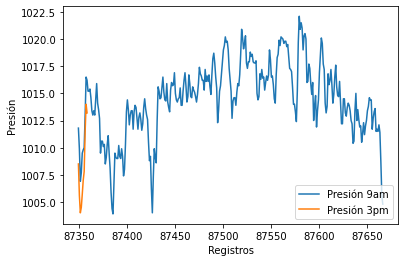

In [52]:
plt.plot(Press9C, label="Presión 9am")
plt.plot(Press3Ca, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

In [60]:
presslimpio9 = aus2['Pressure9am']
presslimpio9.head(10)

Press9l = presslimpio9.head(10)
Press9l

presslimpio3 = aus2['Pressure3pm']
presslimpio3.head(10)

Press3l = presslimpio3.head(10)
Press3l


8927    1002.3
8928    1011.4
8929    1018.8
8930    1017.0
8931    1012.7
8932    1011.0
8933    1009.7
8934    1008.8
8935    1015.9
8936    1013.5
Name: Pressure3pm, dtype: float64

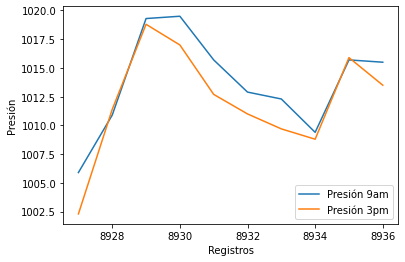

In [61]:
plt.plot(Press9l, label="Presión 9am")
plt.plot(Press3l, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 